In [1]:
import pandas as pd

# Read red wine CSV file
red_wine_file = 'winequality-red.csv'
red_data = pd.read_csv(red_wine_file,delimiter=';')
red_data['wine_type'] = 0  # Flad for Red wine

# Read white wine CSV file
white_wine_file = 'winequality-white.csv'
white_data = pd.read_csv(white_wine_file,delimiter=';')
white_data['wine_type'] = 1  # Falg for white wine

#Combine all data 
combined_data = pd.concat([red_data, white_data], axis=0)

In [2]:
combined_data.shape

(6497, 13)

In [3]:
#Preprocessing
# Remove Duplicates 
combined_data = combined_data.drop_duplicates()

In [4]:
#Preprocessing
# Check for null data
print(combined_data['wine_type'].isnull().sum())

0


In [5]:
#Preprocessing
# Separate features and labels
x = combined_data.drop(['wine_type'], axis=1)  # Features
y = combined_data['wine_type']  # Labels

In [6]:
#Preprocessing
# Normalize Data
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [7]:
#split test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
# Model Selection
from sklearn.svm import SVC
svm_model = SVC(C=10 , gamma= 0.1, kernel="linear" , probability=True)

In [9]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print (scores)  

[0.99178404 0.99529965 0.99764982 0.99059929 0.99412456]


In [10]:
# Choosing best Parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': [0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [11]:
# Training
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', probability=True)

In [12]:
# Computational Times for Trainig
import time
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

Training time: 0.5054 seconds


In [13]:
# prediction
y_predict_test = svm_model.predict(X_test)

In [14]:
# Computational Times for Testing
start_time = time.time()
y_pred = svm_model.predict(X_test)
testing_time = time.time() - start_time
print(f"Testing time: {testing_time:.4f} seconds")

Testing time: 0.0020 seconds


In [15]:
# mertics
from sklearn.metrics import confusion_matrix , precision_score , recall_score, accuracy_score

confusion_test  = confusion_matrix(y_test , y_predict_test)
precision_test  = precision_score (y_test , y_predict_test)
recall_test     = recall_score    (y_test , y_predict_test)
accuracy_test   = accuracy_score  (y_test , y_predict_test)

print ("confusion    :\n" , confusion_test ,
       "\n precision : "  , precision_test*100 ,"%",
       "\n recall    : "  , recall_test*100    ,"%",
       "\n accuracy  : "  ,accuracy_test*100   ,"%")


confusion    :
 [[288   1]
 [  2 773]] 
 precision :  99.87080103359173 % 
 recall    :  99.74193548387098 % 
 accuracy  :  99.71804511278195 %


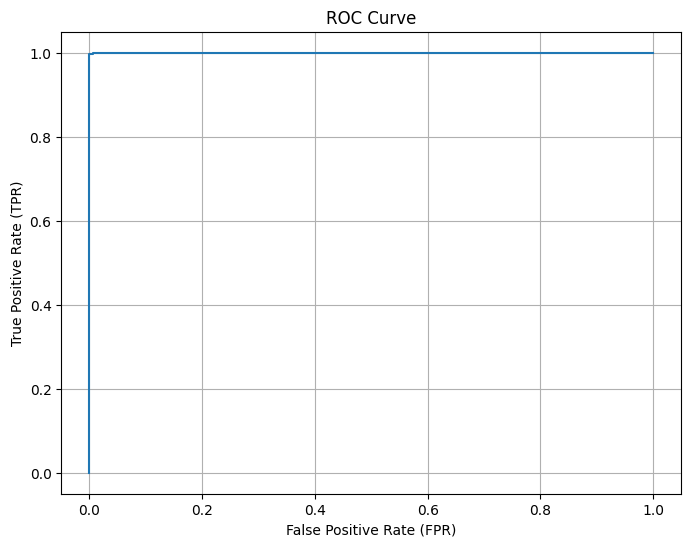

In [16]:
# ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_prob = svm_model.predict_proba(X_test)[:, 1]

# ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test,y_prob )

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()
